In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [5]:
data=train.append(test)

In [6]:
data.head()

,Age,Attrition_rate,Compensation_and_Benefits,Decision_skill_possess,Education_Level,Employee_ID,Gender,Hometown,Pay_Scale,Post_Level,...,Unit,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
0,42.0,0.1841,type2,Conceptual,4,EID_23371,F,Franklin,7.0,1,...,IT,4,0.7516,1.8688,2.0,4,5,3,3.0,33
1,24.0,0.0670,type2,Analytical,3,EID_18000,M,Springfield,6.0,3,...,Logistics,3,-0.9612,-0.4537,2.0,3,5,3,4.0,36
2,58.0,0.0851,type2,Conceptual,3,EID_3891,F,Clinton,8.0,2,...,Quality,4,-0.9612,-0.4537,3.0,3,8,3,1.0,51
3,26.0,0.0668,type2,Behavioral,3,EID_17492,F,Lebanon,8.0,3,...,Human Resource Management,3,-1.8176,-0.4537,NaN,3,7,3,1.0,56
4,31.0,0.1827,type3,Conceptual,1,EID_22534,F,Springfield,2.0,3,...,Logistics,1,0.7516,-0.4537,2.0,2,8,2,3.0,62


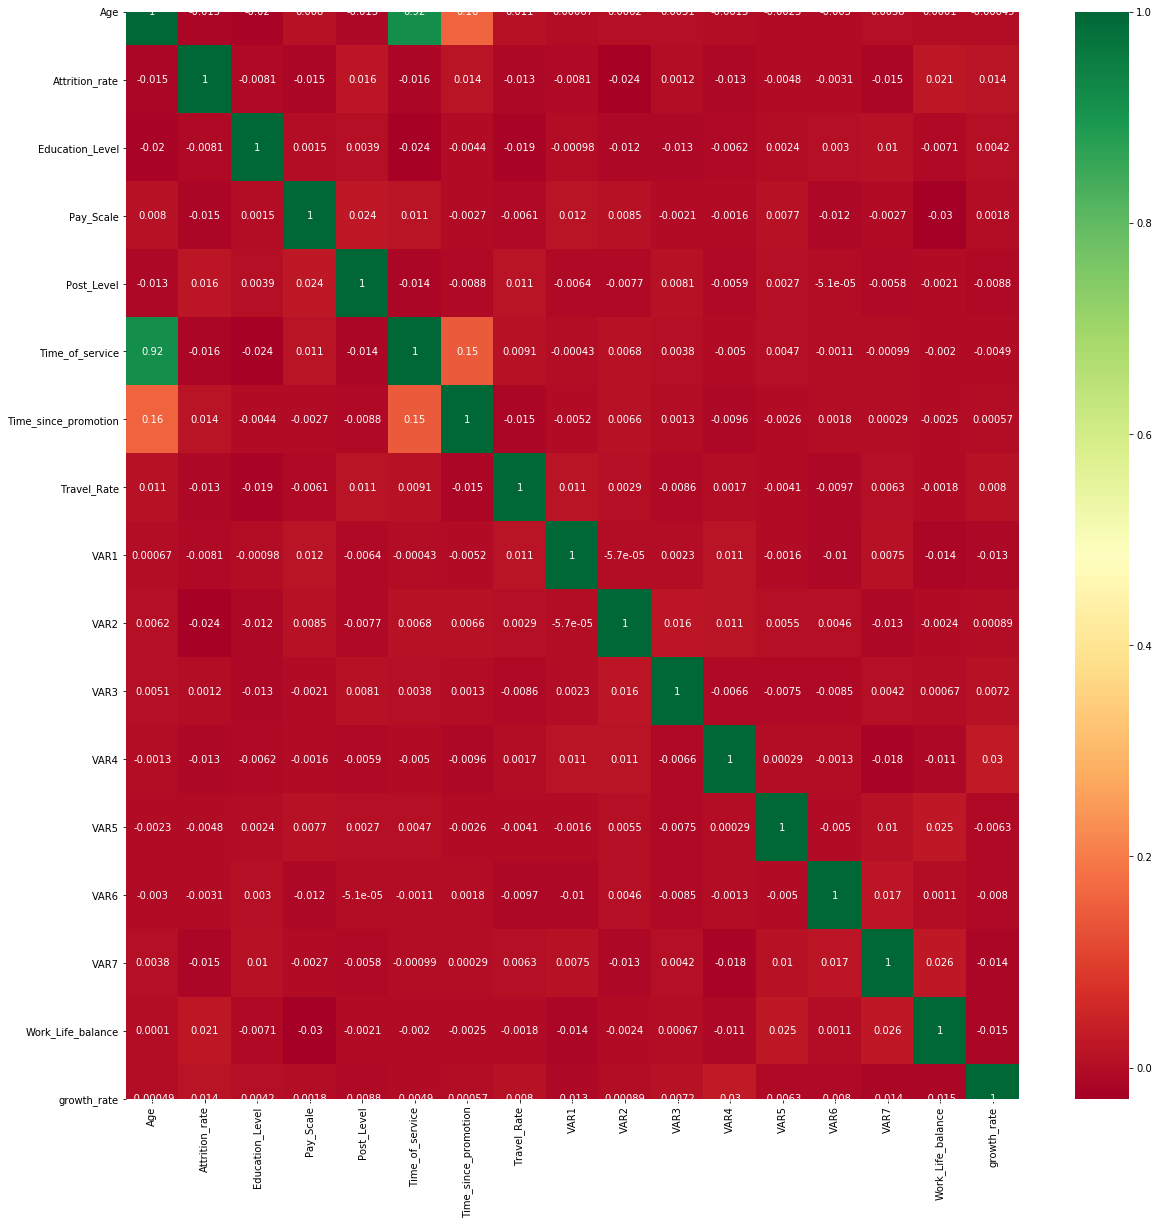

In [7]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
X = data.drop(['Attrition_rate','Employee_ID'],axis=1)
Y = data['Attrition_rate']
X.head()

#OR you can write this way
'''X =data.iloc[:,1:23]
Y = data.iloc[:,23]'''


'X =data.iloc[:,1:23]\nY = data.iloc[:,23]'

In [9]:
X.columns

Index(['Age', 'Compensation_and_Benefits', 'Decision_skill_possess',
       'Education_Level', 'Gender', 'Hometown', 'Pay_Scale', 'Post_Level',
       'Relationship_Status', 'Time_of_service', 'Time_since_promotion',
       'Travel_Rate', 'Unit', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Work_Life_balance', 'growth_rate'],
      dtype='object')

In [10]:
X.shape,Y.shape

((10000, 22), (10000,))

In [11]:
cat_features =  list(X.select_dtypes(include=object).columns)

In [12]:
lis_encoded=[]

In [13]:
for i in cat_features:
    obj=pd.get_dummies(X[i],drop_first=True)
    lis_encoded.append(obj)

In [14]:
for i in lis_encoded:
    print(i.head())

   type1  type2  type3  type4
0      0      1      0      0
1      0      1      0      0
2      0      1      0      0
3      0      1      0      0
4      0      0      1      0
   Behavioral  Conceptual  Directive
0           0           1          0
1           0           0          0
2           0           1          0
3           1           0          0
4           0           1          0
   M
0  0
1  1
2  0
3  0
4  0
   Franklin  Lebanon  Springfield  Washington
0         1        0            0           0
1         0        0            1           0
2         0        0            0           0
3         0        1            0           0
4         0        0            1           0
   Single
0       0
1       1
2       0
3       1
4       0
   Human Resource Management  IT  Logistics  Marketing  Operarions  \
0                          0   1          0          0           0   
1                          0   0          1          0           0   
2                     

In [15]:
X.head()

,Age,Compensation_and_Benefits,Decision_skill_possess,Education_Level,Gender,Hometown,Pay_Scale,Post_Level,Relationship_Status,Time_of_service,...,Unit,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
0,42.0,type2,Conceptual,4,F,Franklin,7.0,1,Married,4.0,...,IT,4,0.7516,1.8688,2.0,4,5,3,3.0,33
1,24.0,type2,Analytical,3,M,Springfield,6.0,3,Single,5.0,...,Logistics,3,-0.9612,-0.4537,2.0,3,5,3,4.0,36
2,58.0,type2,Conceptual,3,F,Clinton,8.0,2,Married,27.0,...,Quality,4,-0.9612,-0.4537,3.0,3,8,3,1.0,51
3,26.0,type2,Behavioral,3,F,Lebanon,8.0,3,Single,4.0,...,Human Resource Management,3,-1.8176,-0.4537,NaN,3,7,3,1.0,56
4,31.0,type3,Conceptual,1,F,Springfield,2.0,3,Married,5.0,...,Logistics,1,0.7516,-0.4537,2.0,2,8,2,3.0,62


In [16]:
## Drop Categorical Features
for i in cat_features:
    X=X.drop([i],axis=1)

In [17]:
X.head()

,Age,Education_Level,Pay_Scale,Post_Level,Time_of_service,Time_since_promotion,Travel_Rate,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
0,42.0,4,7.0,1,4.0,4,1,4,0.7516,1.8688,2.0,4,5,3,3.0,33
1,24.0,3,6.0,3,5.0,4,0,3,-0.9612,-0.4537,2.0,3,5,3,4.0,36
2,58.0,3,8.0,2,27.0,3,0,4,-0.9612,-0.4537,3.0,3,8,3,1.0,51
3,26.0,3,8.0,3,4.0,3,1,3,-1.8176,-0.4537,NaN,3,7,3,1.0,56
4,31.0,1,2.0,3,5.0,4,1,1,0.7516,-0.4537,2.0,2,8,2,3.0,62


In [18]:
#add encoded features
for i in lis_encoded:
    X=pd.concat([X,i],axis=1)

In [19]:
X.head()

,Age,Education_Level,Pay_Scale,Post_Level,Time_of_service,Time_since_promotion,Travel_Rate,VAR1,VAR2,VAR3,...,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security
0,42.0,4,7.0,1,4.0,4,1,4,0.7516,1.8688,...,1,0,0,0,0,0,0,0,0,0
1,24.0,3,6.0,3,5.0,4,0,3,-0.9612,-0.4537,...,0,1,0,0,0,0,0,0,0,0
2,58.0,3,8.0,2,27.0,3,0,4,-0.9612,-0.4537,...,0,0,0,0,0,0,1,0,0,0
3,26.0,3,8.0,3,4.0,3,1,3,-1.8176,-0.4537,...,0,0,0,0,0,0,0,0,0,0
4,31.0,1,2.0,3,5.0,4,1,1,0.7516,-0.4537,...,0,1,0,0,0,0,0,0,0,0


In [20]:
X.shape

(10000, 40)

In [21]:
X.isnull().sum()

Age                          573
Education_Level                0
Pay_Scale                     12
Post_Level                     0
Time_of_service              196
Time_since_promotion           0
Travel_Rate                    0
VAR1                           0
VAR2                         794
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
Work_Life_balance             16
growth_rate                    0
type1                          0
type2                          0
type3                          0
type4                          0
Behavioral                     0
Conceptual                     0
Directive                      0
M                              0
Franklin                       0
Lebanon                        0
Springfield                    0
Washington                     0
Single                         0
Human Resource Management      0
IT        

In [22]:
#Filling all missing values

X['Age'].fillna(X['Age'].mean(),inplace=True)
X['Pay_Scale'].fillna(X.Pay_Scale.median(),inplace=True)
X['Time_of_service'].fillna(X.Time_of_service.mean(),inplace=True)
X['VAR2'].fillna(X.VAR2.median(),inplace=True)
X['VAR4'].fillna(X.VAR4.mode()[0],inplace=True)
X.Work_Life_balance.fillna(X.Work_Life_balance.mean(),inplace=True)

In [23]:
X.isnull().sum()

Age                          0
Education_Level              0
Pay_Scale                    0
Post_Level                   0
Time_of_service              0
Time_since_promotion         0
Travel_Rate                  0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Work_Life_balance            0
growth_rate                  0
type1                        0
type2                        0
type3                        0
type4                        0
Behavioral                   0
Conceptual                   0
Directive                    0
M                            0
Franklin                     0
Lebanon                      0
Springfield                  0
Washington                   0
Single                       0
Human Resource Management    0
IT                           0
Logistics                    0
Marketin

In [24]:
main_X=X.copy()

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# normalization of the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
X_train = X[:7000,:]
Y_train = Y[:7000]
X_test = X[7000:,:]

In [26]:
#train test split
#X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size = 0.2)

In [27]:
#X_train.shape

(5600, 40)

# Hyperparameter Optimization

In [43]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost


In [44]:
## Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# XGBRegressor()

In [27]:
regressor=xgboost.XGBRegressor()

In [30]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [32]:
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   54.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 15.8min finished


[06:33:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [33]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [34]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
regressor.fit(X_train,Y_train)

[06:34:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
y_pred=regressor.predict(X_test)

In [39]:
y_pred.shape

(3000,)

In [41]:
import pickle
filename = 'HyperParameter_XGBoost.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [42]:
#create sample submission file and submit it
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('Test.csv')
sub_df=sub_df['Employee_ID']
ds=pd.concat([sub_df,pred],axis=1)
ds.columns=['Employee_ID','Attrition_rate']
ds.to_csv('output2.csv',index=False)

# 2) XGBRFRegressor()      (XGB with Random Forest)

In [46]:
regressor=xgboost.XGBRFRegressor()

In [47]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [48]:
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 20.0min finished


[07:04:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1,
                                            colsample_bynode=0.8,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_p...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
         

In [49]:
random_cv.best_estimator_

XGBRFRegressor(base_score=0.25, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
               max_depth=3, min_child_weight=3, missing=None, n_estimators=900,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [50]:
regressor=xgboost.XGBRFRegressor(base_score=0.25, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
               max_depth=3, min_child_weight=3, missing=None, n_estimators=900,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [51]:
regressor.fit(X_train,Y_train)

[07:06:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.25, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
               max_depth=3, min_child_weight=3, missing=None, n_estimators=900,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [52]:
y_pred=regressor.predict(X_test)

In [53]:
y_pred.shape

(3000,)

In [54]:
#create sample submission file and submit it
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('Test.csv')
sub_df=sub_df['Employee_ID']
ds=pd.concat([sub_df,pred],axis=1)
ds.columns=['Employee_ID','Attrition_rate']
ds.to_csv('output2.csv',index=False)

# Ridge with L2 regularization

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [30]:
y_pred=ridge_regressor.predict(X_test)

In [31]:
y_pred.shape

(3000,)

In [32]:
#create sample submission file and submit it
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('Test.csv')
sub_df=sub_df['Employee_ID']
ds=pd.concat([sub_df,pred],axis=1)
ds.columns=['Employee_ID','Attrition_rate']
ds.to_csv('output2.csv',index=False)

# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [34]:
y_pred=lasso_regressor.predict(X_test)

In [35]:
y_pred.shape

(3000,)

In [36]:
#create sample submission file and submit it
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('Test.csv')
sub_df=sub_df['Employee_ID']
ds=pd.concat([sub_df,pred],axis=1)
ds.columns=['Employee_ID','Attrition_rate']
ds.to_csv('output2.csv',index=False)

# ElasticNet

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
enet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [38]:
y_pred=lasso_regressor.predict(X_test)

In [39]:
y_pred.shape

(3000,)

In [40]:
#create sample submission file and submit it
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('Test.csv')
sub_df=sub_df['Employee_ID']
ds=pd.concat([sub_df,pred],axis=1)
ds.columns=['Employee_ID','Attrition_rate']
ds.to_csv('output2.csv',index=False)

# Random Forest Regressor with hyperparameter tuning

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [46]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 49.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [47]:
y_pred=rf_random.predict(X_test)

In [48]:
y_pred.shape

(3000,)

In [50]:
import pickle
filename = 'HyperParameter_RandomForest.pkl'
pickle.dump(rf_random, open(filename, 'wb'))

In [51]:
#create sample submission file and submit it
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('Test.csv')
sub_df=sub_df['Employee_ID']
ds=pd.concat([sub_df,pred],axis=1)
ds.columns=['Employee_ID','Attrition_rate']
ds.to_csv('output2.csv',index=False)